##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq, StaticArrays, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k = 0.0;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k, el_link]


p = [a, b, c, d, s, xr, r, I, xv, k, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [4]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [5]:
ds = ds_HR1

pvalues = range(0.050, stop = 0.056, length = 2000)
i = 1
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 10

10

In [6]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.05
parameter = 0.05000300150075038
parameter = 0.05000600300150075
parameter = 0.050009004502251125
parameter = 0.0500120060030015
parameter = 0.050015007503751874
parameter = 0.05001800900450225
parameter = 0.05002101050525263
parameter = 0.050024012006003
parameter = 0.05002701350675338
parameter = 0.05003001500750375
parameter = 0.050033016508254126
parameter = 0.0500360180090045
parameter = 0.050039019509754874
parameter = 0.050042021010505255
parameter = 0.05004502251125563
parameter = 0.050048024012006004
parameter = 0.05005102551275638
parameter = 0.05005402701350675
parameter = 0.050057028514257126
parameter = 0.0500600300150075
parameter = 0.05006303151575788
parameter = 0.050066033016508256
parameter = 0.05006903451725863
parameter = 0.050072036018009004
parameter = 0.05007503751875938
parameter = 0.05007803901950975
parameter = 0.05008104052026013
parameter = 0.05008404202101051
parameter = 0.05008704352176088
parameter = 0.050090045022511256
parameter = 0.0500

parameter = 0.05077138569284642
parameter = 0.050774387193596796
parameter = 0.05077738869434718
parameter = 0.05078039019509755
parameter = 0.050783391695847925
parameter = 0.0507863931965983
parameter = 0.05078939469734867
parameter = 0.05079239619809905
parameter = 0.05079539769884942
parameter = 0.0507983991995998
parameter = 0.05080140070035018
parameter = 0.05080440220110055
parameter = 0.050807403701850926
parameter = 0.0508104052026013
parameter = 0.050813406703351674
parameter = 0.05081640820410205
parameter = 0.05081940970485243
parameter = 0.050822411205602804
parameter = 0.05082541270635318
parameter = 0.05082841420710355
parameter = 0.050831415707853926
parameter = 0.0508344172086043
parameter = 0.050837418709354674
parameter = 0.050840420210105056
parameter = 0.05084342171085543
parameter = 0.050846423211605804
parameter = 0.05084942471235618
parameter = 0.05085242621310655
parameter = 0.05085542771385693
parameter = 0.0508584292146073
parameter = 0.05086143071535768
para

parameter = 0.05154277138569285
parameter = 0.05154577288644322
parameter = 0.051548774387193595
parameter = 0.05155177588794397
parameter = 0.05155477738869435
parameter = 0.051557778889444725
parameter = 0.0515607803901951
parameter = 0.05156378189094547
parameter = 0.05156678339169585
parameter = 0.05156978489244622
parameter = 0.051572786393196596
parameter = 0.05157578789394698
parameter = 0.05157878939469735
parameter = 0.051581790895447725
parameter = 0.0515847923961981
parameter = 0.051587793896948474
parameter = 0.05159079539769885
parameter = 0.05159379689844922
parameter = 0.0515967983991996
parameter = 0.05159979989994998
parameter = 0.05160280140070035
parameter = 0.051605802901450726
parameter = 0.0516088044022011
parameter = 0.051611805902951474
parameter = 0.05161480740370185
parameter = 0.05161780890445223
parameter = 0.051620810405202604
parameter = 0.05162381190595298
parameter = 0.05162681340670335
parameter = 0.051629814907453726
parameter = 0.0516328164082041
para

parameter = 0.05231115557778889
parameter = 0.05231415707853927
parameter = 0.052317158579289647
parameter = 0.05232016008004002
parameter = 0.052323161580790395
parameter = 0.05232616308154077
parameter = 0.05232916458229114
parameter = 0.05233216608304152
parameter = 0.0523351675837919
parameter = 0.05233816908454227
parameter = 0.05234117058529265
parameter = 0.05234417208604302
parameter = 0.052347173586793395
parameter = 0.05235017508754377
parameter = 0.052353176588294144
parameter = 0.052356178089044525
parameter = 0.0523591795897949
parameter = 0.05236218109054527
parameter = 0.05236518259129565
parameter = 0.05236818409204602
parameter = 0.052371185592796396
parameter = 0.05237418709354677
parameter = 0.05237718859429715
parameter = 0.052380190095047525
parameter = 0.0523831915957979
parameter = 0.052386193096548274
parameter = 0.05238919459729865
parameter = 0.05239219609804902
parameter = 0.052395197598799396
parameter = 0.05239819909954978
parameter = 0.05240120060030015
pa

parameter = 0.05308554277138569
parameter = 0.053088544272136065
parameter = 0.053091545772886446
parameter = 0.05309454727363682
parameter = 0.053097548774387195
parameter = 0.05310055027513757
parameter = 0.05310355177588794
parameter = 0.05310655327663832
parameter = 0.05310955477738869
parameter = 0.05311255627813907
parameter = 0.05311555777888945
parameter = 0.05311855927963982
parameter = 0.053121560780390195
parameter = 0.05312456228114057
parameter = 0.053127563781890944
parameter = 0.05313056528264132
parameter = 0.0531335667833917
parameter = 0.05313656828414207
parameter = 0.05313956978489245
parameter = 0.05314257128564282
parameter = 0.053145572786393196
parameter = 0.05314857428714357
parameter = 0.053151575787893944
parameter = 0.053154577288644325
parameter = 0.0531575787893947
parameter = 0.053160580290145074
parameter = 0.05316358179089545
parameter = 0.05316658329164582
parameter = 0.053169584792396196
parameter = 0.05317258629314657
parameter = 0.05317558779389695


parameter = 0.05385992996498249
parameter = 0.053862931465732865
parameter = 0.05386593296648324
parameter = 0.05386893446723362
parameter = 0.053871935967983994
parameter = 0.05387493746873437
parameter = 0.05387793896948474
parameter = 0.05388094047023512
parameter = 0.05388394197098549
parameter = 0.053886943471735865
parameter = 0.053889944972486246
parameter = 0.05389294647323662
parameter = 0.053895947973986995
parameter = 0.05389894947473737
parameter = 0.05390195097548774
parameter = 0.05390495247623812
parameter = 0.05390795397698849
parameter = 0.05391095547773887
parameter = 0.05391395697848925
parameter = 0.05391695847923962
parameter = 0.053919959979989995
parameter = 0.05392296148074037
parameter = 0.053925962981490744
parameter = 0.05392896448224112
parameter = 0.0539319659829915
parameter = 0.05393496748374187
parameter = 0.05393796898449225
parameter = 0.05394097048524262
parameter = 0.053943971985992996
parameter = 0.05394697348674337
parameter = 0.053949974987493744


parameter = 0.05462831415707854
parameter = 0.054631315657828916
parameter = 0.05463431715857929
parameter = 0.054637318659329664
parameter = 0.05464032016008004
parameter = 0.05464332166083041
parameter = 0.05464632316158079
parameter = 0.05464932466233117
parameter = 0.05465232616308154
parameter = 0.05465532766383192
parameter = 0.05465832916458229
parameter = 0.054661330665332665
parameter = 0.05466433216608304
parameter = 0.05466733366683341
parameter = 0.054670335167583795
parameter = 0.05467333666833417
parameter = 0.05467633816908454
parameter = 0.05467933966983492
parameter = 0.05468234117058529
parameter = 0.054685342671335666
parameter = 0.05468834417208604
parameter = 0.05469134567283642
parameter = 0.054694347173586795
parameter = 0.05469734867433717
parameter = 0.05470035017508754
parameter = 0.05470335167583792
parameter = 0.05470635317658829
parameter = 0.054709354677338666
parameter = 0.05471235617808905
parameter = 0.05471535767883942
parameter = 0.054718359179589796


parameter = 0.055402701350675335
parameter = 0.055405702851425716
parameter = 0.05540870435217609
parameter = 0.055411705852926464
parameter = 0.05541470735367684
parameter = 0.05541770885442721
parameter = 0.05542071035517759
parameter = 0.05542371185592796
parameter = 0.05542671335667834
parameter = 0.055429714857428716
parameter = 0.05543271635817909
parameter = 0.055435717858929465
parameter = 0.05543871935967984
parameter = 0.05544172086043021
parameter = 0.05544472236118059
parameter = 0.05544772386193097
parameter = 0.05545072536268134
parameter = 0.05545372686343172
parameter = 0.05545672836418209
parameter = 0.055459729864932465
parameter = 0.05546273136568284
parameter = 0.055465732866433214
parameter = 0.055468734367183595
parameter = 0.05547173586793397
parameter = 0.05547473736868434
parameter = 0.05547773886943472
parameter = 0.05548074037018509
parameter = 0.055483741870935466
parameter = 0.05548674337168584
parameter = 0.05548974487243622
parameter = 0.05549274637318659

In [7]:
ds = ds_HR1

pvalues = range(0.050, stop = 0.056, length = 2000)
i = 4
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 10

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.05
parameter = 0.05000300150075038
parameter = 0.05000600300150075
parameter = 0.050009004502251125
parameter = 0.0500120060030015
parameter = 0.050015007503751874
parameter = 0.05001800900450225
parameter = 0.05002101050525263
parameter = 0.050024012006003
parameter = 0.05002701350675338
parameter = 0.05003001500750375
parameter = 0.050033016508254126
parameter = 0.0500360180090045
parameter = 0.050039019509754874
parameter = 0.050042021010505255
parameter = 0.05004502251125563
parameter = 0.050048024012006004
parameter = 0.05005102551275638
parameter = 0.05005402701350675
parameter = 0.050057028514257126
parameter = 0.0500600300150075
parameter = 0.05006303151575788
parameter = 0.050066033016508256
parameter = 0.05006903451725863
parameter = 0.050072036018009004
parameter = 0.05007503751875938
parameter = 0.05007803901950975
parameter = 0.05008104052026013
parameter = 0.05008404202101051
parameter = 0.05008704352176088
parameter = 0.050090045022511256
parameter = 0.0500

parameter = 0.05076538269134567
parameter = 0.05076838419209605
parameter = 0.05077138569284642
parameter = 0.050774387193596796
parameter = 0.05077738869434718
parameter = 0.05078039019509755
parameter = 0.050783391695847925
parameter = 0.0507863931965983
parameter = 0.05078939469734867
parameter = 0.05079239619809905
parameter = 0.05079539769884942
parameter = 0.0507983991995998
parameter = 0.05080140070035018
parameter = 0.05080440220110055
parameter = 0.050807403701850926
parameter = 0.0508104052026013
parameter = 0.050813406703351674
parameter = 0.05081640820410205
parameter = 0.05081940970485243
parameter = 0.050822411205602804
parameter = 0.05082541270635318
parameter = 0.05082841420710355
parameter = 0.050831415707853926
parameter = 0.0508344172086043
parameter = 0.050837418709354674
parameter = 0.050840420210105056
parameter = 0.05084342171085543
parameter = 0.050846423211605804
parameter = 0.05084942471235618
parameter = 0.05085242621310655
parameter = 0.05085542771385693
par

parameter = 0.05152776388194097
parameter = 0.05153076538269134
parameter = 0.051533766883441724
parameter = 0.0515367683841921
parameter = 0.05153976988494247
parameter = 0.05154277138569285
parameter = 0.05154577288644322
parameter = 0.051548774387193595
parameter = 0.05155177588794397
parameter = 0.05155477738869435
parameter = 0.051557778889444725
parameter = 0.0515607803901951
parameter = 0.05156378189094547
parameter = 0.05156678339169585
parameter = 0.05156978489244622
parameter = 0.051572786393196596
parameter = 0.05157578789394698
parameter = 0.05157878939469735
parameter = 0.051581790895447725
parameter = 0.0515847923961981
parameter = 0.051587793896948474
parameter = 0.05159079539769885
parameter = 0.05159379689844922
parameter = 0.0515967983991996
parameter = 0.05159979989994998
parameter = 0.05160280140070035
parameter = 0.051605802901450726
parameter = 0.0516088044022011
parameter = 0.051611805902951474
parameter = 0.05161480740370185
parameter = 0.05161780890445223
param

parameter = 0.052293146573286646
parameter = 0.05229614807403702
parameter = 0.052299149574787394
parameter = 0.05230215107553777
parameter = 0.05230515257628814
parameter = 0.05230815407703852
parameter = 0.05231115557778889
parameter = 0.05231415707853927
parameter = 0.052317158579289647
parameter = 0.05232016008004002
parameter = 0.052323161580790395
parameter = 0.05232616308154077
parameter = 0.05232916458229114
parameter = 0.05233216608304152
parameter = 0.0523351675837919
parameter = 0.05233816908454227
parameter = 0.05234117058529265
parameter = 0.05234417208604302
parameter = 0.052347173586793395
parameter = 0.05235017508754377
parameter = 0.052353176588294144
parameter = 0.052356178089044525
parameter = 0.0523591795897949
parameter = 0.05236218109054527
parameter = 0.05236518259129565
parameter = 0.05236818409204602
parameter = 0.052371185592796396
parameter = 0.05237418709354677
parameter = 0.05237718859429715
parameter = 0.052380190095047525
parameter = 0.0523831915957979
pa

parameter = 0.053058529264632316
parameter = 0.05306153076538269
parameter = 0.053064532266133065
parameter = 0.05306753376688344
parameter = 0.05307053526763382
parameter = 0.053073536768384194
parameter = 0.05307653826913457
parameter = 0.05307953976988494
parameter = 0.05308254127063532
parameter = 0.05308554277138569
parameter = 0.053088544272136065
parameter = 0.053091545772886446
parameter = 0.05309454727363682
parameter = 0.053097548774387195
parameter = 0.05310055027513757
parameter = 0.05310355177588794
parameter = 0.05310655327663832
parameter = 0.05310955477738869
parameter = 0.05311255627813907
parameter = 0.05311555777888945
parameter = 0.05311855927963982
parameter = 0.053121560780390195
parameter = 0.05312456228114057
parameter = 0.053127563781890944
parameter = 0.05313056528264132
parameter = 0.0531335667833917
parameter = 0.05313656828414207
parameter = 0.05313956978489245
parameter = 0.05314257128564282
parameter = 0.053145572786393196
parameter = 0.05314857428714357


parameter = 0.05382691345672837
parameter = 0.05382991495747874
parameter = 0.053832916458229116
parameter = 0.05383591795897949
parameter = 0.053838919459729864
parameter = 0.05384192096048024
parameter = 0.05384492246123061
parameter = 0.053847923961980994
parameter = 0.05385092546273137
parameter = 0.05385392696348174
parameter = 0.053856928464232116
parameter = 0.05385992996498249
parameter = 0.053862931465732865
parameter = 0.05386593296648324
parameter = 0.05386893446723362
parameter = 0.053871935967983994
parameter = 0.05387493746873437
parameter = 0.05387793896948474
parameter = 0.05388094047023512
parameter = 0.05388394197098549
parameter = 0.053886943471735865
parameter = 0.053889944972486246
parameter = 0.05389294647323662
parameter = 0.053895947973986995
parameter = 0.05389894947473737
parameter = 0.05390195097548774
parameter = 0.05390495247623812
parameter = 0.05390795397698849
parameter = 0.05391095547773887
parameter = 0.05391395697848925
parameter = 0.05391695847923962

parameter = 0.05459229614807404
parameter = 0.05459529764882441
parameter = 0.054598299149574786
parameter = 0.05460130065032516
parameter = 0.054604302151075534
parameter = 0.054607303651825916
parameter = 0.05461030515257629
parameter = 0.054613306653326664
parameter = 0.05461630815407704
parameter = 0.05461930965482741
parameter = 0.05462231115557779
parameter = 0.05462531265632816
parameter = 0.05462831415707854
parameter = 0.054631315657828916
parameter = 0.05463431715857929
parameter = 0.054637318659329664
parameter = 0.05464032016008004
parameter = 0.05464332166083041
parameter = 0.05464632316158079
parameter = 0.05464932466233117
parameter = 0.05465232616308154
parameter = 0.05465532766383192
parameter = 0.05465832916458229
parameter = 0.054661330665332665
parameter = 0.05466433216608304
parameter = 0.05466733366683341
parameter = 0.054670335167583795
parameter = 0.05467333666833417
parameter = 0.05467633816908454
parameter = 0.05467933966983492
parameter = 0.05468234117058529


parameter = 0.05536368184092046
parameter = 0.05536668334167084
parameter = 0.05536968484242121
parameter = 0.055372686343171586
parameter = 0.05537568784392196
parameter = 0.055378689344672334
parameter = 0.05538169084542271
parameter = 0.05538469234617309
parameter = 0.055387693846923464
parameter = 0.05539069534767384
parameter = 0.05539369684842421
parameter = 0.055396698349174586
parameter = 0.05539969984992496
parameter = 0.055402701350675335
parameter = 0.055405702851425716
parameter = 0.05540870435217609
parameter = 0.055411705852926464
parameter = 0.05541470735367684
parameter = 0.05541770885442721
parameter = 0.05542071035517759
parameter = 0.05542371185592796
parameter = 0.05542671335667834
parameter = 0.055429714857428716
parameter = 0.05543271635817909
parameter = 0.055435717858929465
parameter = 0.05543871935967984
parameter = 0.05544172086043021
parameter = 0.05544472236118059
parameter = 0.05544772386193097
parameter = 0.05545072536268134
parameter = 0.05545372686343172

In [8]:
output_summ = output + output1;

In [9]:
directory = "C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files"
filename = "\\orbit_dia_k1=k2_zoom.jld"
path = directory*filename

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files\\orbit_dia_k1=k2_zoom.jld"

In [13]:
save(path, "data", output_summ)

In [10]:
ticks = range(0.050, 0.056, length = 4)

0.05:0.002:0.056

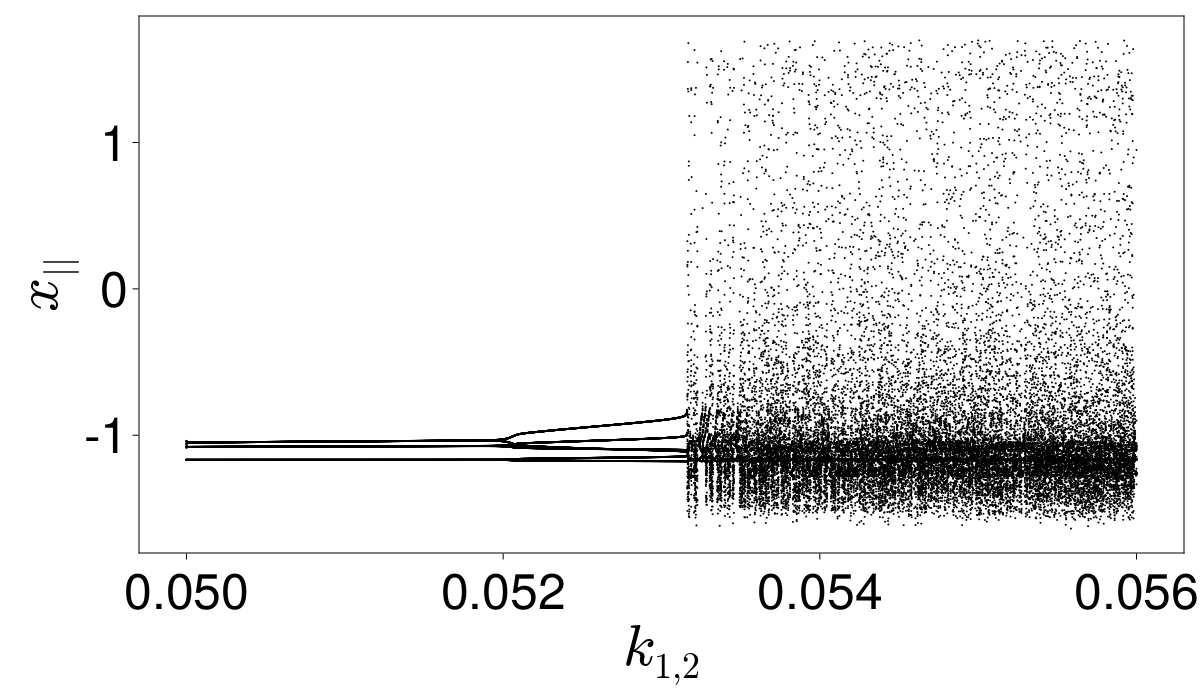

In [12]:
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 2.0
    )
    
end

fig